# Домашнее задание 5. Применение методов ML к прогнозированию временных рядов

# Одномерный временной ряд (4 балла)

Вернись к данным из ДЗ_4 о спросе на электроэнергию. Файл `hw_AEP.csv`. Скопируй свой код предобработки данных и разделение на тест и трейн. Метрики для оценки качества сохрани такими же, как в ДЗ_4.

In [1]:
import pandas as pd

In [2]:
# твой код
df_aep = pd.read_csv('hw_AEP.csv', index_col=0)
df_aep

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [3]:
df_aep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9+ MB


In [4]:
df_aep.index = pd.to_datetime(df_aep.index)
df_aep = df_aep.drop_duplicates()
df_aep = df_aep.dropna()

#size_ = 50
#train = df_aep[: -size_]
#test = df_aep[-size_: ]

Метрики были: mean_absolute_error(), mean_squared_error()

Построй прогноз для тестовой выборки с помощью одной из библиотек LightGBM, XGBoost, CatBoost. Используй только календарные признаки, оценку и удаление тренда / сезонности (при необходимости).
- Настрой гиперпараметры модели.
- Оцени важность признаков. Поясни, как вычисляется важность признаков.
- Проведи отбор признаков. Стратегия отбора на твоё усмотрение.
- Построй интервальный прогноз с помощью квантильной регрессии.
- Построй графики.
- Оцени качество построенной модели.
- Проведи анализ остатков.


In [5]:
!pip install -q catboost

In [6]:
df_aep = df_aep.asfreq('h')
df_aep = df_aep.fillna(method='ffill')

<ipython-input-6-0d0fa7281884>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_aep = df_aep.fillna(method='ffill')


In [7]:
# твой код
df_aep['year'] = df_aep.index.year
df_aep['month'] = df_aep.index.month
df_aep['day'] = df_aep.index.day
df_aep['weekday'] = df_aep.index.weekday
df_aep['hour'] = df_aep.index.hour
df_aep['quarter'] = df_aep.index.quarter

In [8]:
from statsmodels.tsa.seasonal import STL

In [9]:
stl = STL(df_aep['AEP_MW'], seasonal=25)
result = stl.fit()
df_aep['trend_day'] = result.trend
df_aep['seasonal_day'] = result.seasonal
df_aep['residual_day'] = result.resid

In [10]:
stl = STL(df_aep['AEP_MW'], seasonal=167)
result = stl.fit()
df_aep['trend_week'] = result.trend
df_aep['seasonal_week'] = result.seasonal
df_aep['residual_week'] = result.resid

In [11]:
size_ = 50
train = df_aep[: -size_]
test = df_aep[-size_: ]
X_train = train[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'trend_day', 'seasonal_day', 'trend_week', 'seasonal_week']]
y_train = train['AEP_MW']
X_test = test[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'trend_day', 'seasonal_day', 'trend_week', 'seasonal_week']]
y_test = test['AEP_MW']

In [12]:
X_train

,year,month,day,weekday,hour,quarter,trend_day,seasonal_day,trend_week,seasonal_week
Datetime,,,,,,,,,,
2004-10-01 01:00:00,2004,10,1,4,1,4,14174.015843,-1604.429364,14180.764543,-1792.918253
2004-10-01 02:00:00,2004,10,1,4,2,4,14172.757556,-2063.619148,14181.529141,-2219.080817
2004-10-01 03:00:00,2004,10,1,4,3,4,14171.241801,-2290.656374,14182.142730,-2410.933980
2004-10-01 04:00:00,2004,10,1,4,4,4,14169.440188,-2361.575011,14182.561328,-2429.956278
2004-10-01 05:00:00,2004,10,1,4,5,4,14167.327704,-2290.730204,14182.734095,-2246.011433
...,...,...,...,...,...,...,...,...,...,...
2018-07-12 11:00:00,2018,7,12,3,11,3,21470.087194,7.318983,21473.546326,-93.775287
2018-07-12 12:00:00,2018,7,12,3,12,3,21470.351262,6.342424,21472.254819,-104.639065
2018-07-12 13:00:00,2018,7,12,3,13,3,21470.531967,5.358985,21470.903315,-115.494681


In [13]:
!pip install -q optuna

In [14]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [15]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 5, 8),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10)
    }

    model = CatBoostRegressor(**param, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-12-08 12:09:08,532] A new study created in memory with name: no-name-6645cf70-3698-4010-9f5f-097b319fb53c
[I 2024-12-08 12:09:12,510] Trial 0 finished with value: 49.79977178323286 and parameters: {'iterations': 221, 'learning_rate': 0.058244569363464095, 'depth': 6, 'l2_leaf_reg': 2}. Best is trial 0 with value: 49.79977178323286.
[I 2024-12-08 12:09:30,027] Trial 1 finished with value: 48.169362826657306 and parameters: {'iterations': 767, 'learning_rate': 0.07152631406434151, 'depth': 7, 'l2_leaf_reg': 3}. Best is trial 1 with value: 48.169362826657306.
[I 2024-12-08 12:09:44,041] Trial 2 finished with value: 52.11341126729232 and parameters: {'iterations': 623, 'learning_rate': 0.09592310228812827, 'depth': 7, 'l2_leaf_reg': 5}. Best is trial 1 with value: 48.169362826657306.
[I 2024-12-08 12:09:49,101] Trial 3 finished with value: 56.28478537979725 and parameters: {'iterations': 166, 'learning_rate': 0.031894719509552846, 'depth': 7, 'l2_leaf_reg': 3}. Best is trial 1 with

In [16]:
import optuna.visualization as vis

In [17]:
vis.plot_param_importances(study)

Теперь отбор признаков

In [18]:
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train, y_train)
feature_importance = model.get_feature_importance()
features = X_train.columns

In [19]:
import numpy as np

In [20]:
important_features = features[np.argsort(feature_importance)[::-1]]
important_features

Index(['trend_week', 'trend_day', 'seasonal_day', 'year', 'seasonal_week',
       'month', 'quarter', 'weekday', 'hour', 'day'],
      dtype='object')

In [21]:
feature_importance

array([ 4.13234252,  0.5216651 ,  0.08125576,  0.49759042,  0.46262651,
        0.5205721 , 31.40210312, 11.53317135, 47.64884665,  3.19982646])

In [22]:
important_features = important_features[:-2]

In [23]:
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train[important_features], y_train)

In [24]:
best_params

{'iterations': 452,
 'learning_rate': 0.019449770286666685,
 'depth': 8,
 'l2_leaf_reg': 9}

In [27]:
from sklearn.linear_model import QuantileRegressor
from sklearn.model_selection import train_test_split

In [28]:
X_train_big, X_train_small, y_train_big, y_train_small = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=42)


In [29]:
quantile_model_lower = QuantileRegressor(quantile=0.05, alpha=0).fit(X_train_small, y_train_small)
quantile_model_upper = QuantileRegressor(quantile=0.95, alpha=0).fit(X_train_small, y_train_small)
y_pred_lower = quantile_model_lower.predict(X_test)
y_pred_upper = quantile_model_upper.predict(X_test)

In [30]:
import matplotlib.pyplot as plt

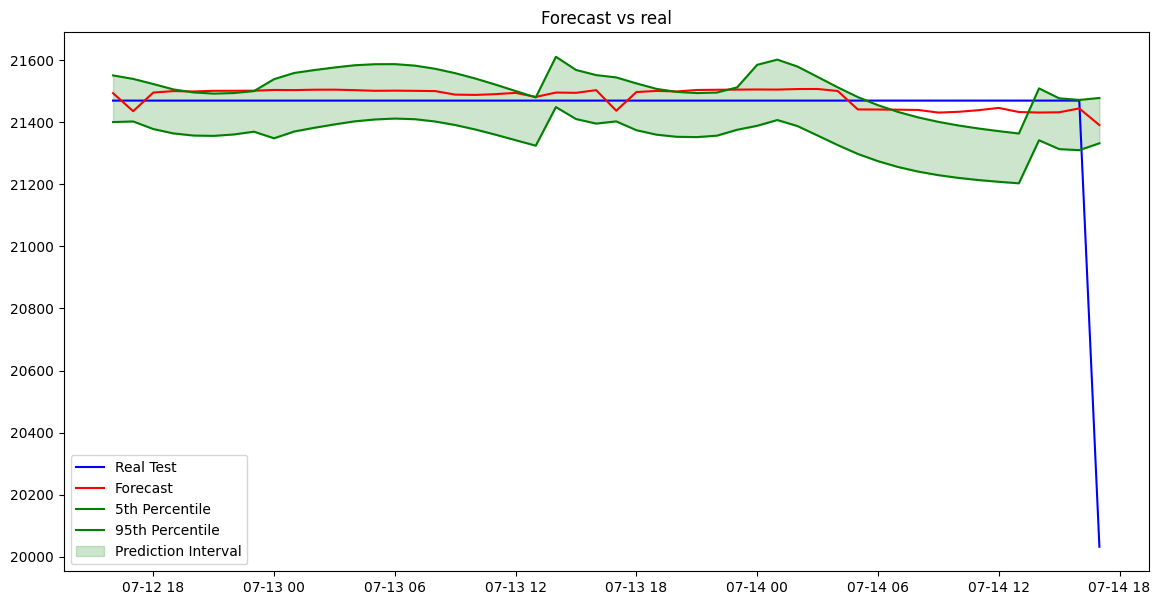

In [33]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real Test', color='blue')
plt.plot(y_test.index, model.predict(X_test[important_features]), label='Forecast', color='red')
plt.plot(y_test.index, y_pred_lower, label='5th Percentile', color='green')
plt.plot(y_test.index, y_pred_upper, label='95th Percentile', color='green')
plt.fill_between(y_test.index, y_pred_lower, y_pred_upper, color='green', alpha=0.2, label='Prediction Interval')

plt.legend()
plt.legend()
plt.title('Forecast vs real')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_absolute_error(y_test, model.predict(X_test[important_features])), mean_squared_error(y_test, model.predict(X_test[important_features]))

(57.2483403619453, 37894.122529925946)

In [37]:
import seaborn as sns

Text(0.5, 1.0, 'Residuals')

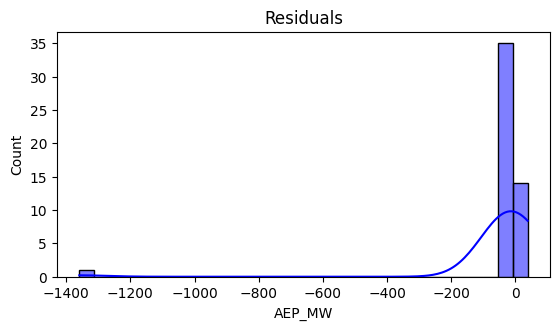

In [38]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals')

Text(0, 0.5, 'Residuals')

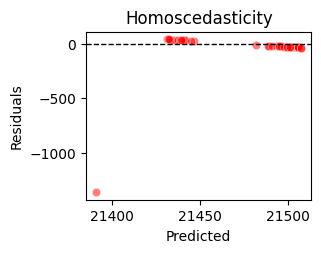

In [44]:
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred, y=residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

Остатки не распределены нормально, и это естественно, потому что в тестовых данных в конце происходит не очен предсказуемый спад. Дисперсия остатков тоже не постоянная

Построй новую модель, добавь любые другие признаки. Построй прогноз для тестовой выборки.
- Настрой гиперпараметры модели.
- Оцени важность признаков.
- Проведи отбор признаков. Стратегия отбора на твоё усмотрение.
- Построй интервальный прогноз с помощью квантильной регрессии.
- Построй графики.
- Оцени качество построенной модели.
- Проведи анализ остатков.

Я решила сделать похожее, но обучить на RMSE просто. И добавить еще признак выходного...

In [45]:
# твой код
df_aep['is_weekend'] = df_aep.index.weekday >= 5

In [46]:
size_ = 50
train = df_aep[: -size_]
test = df_aep[-size_: ]
X_train = train[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'trend_day', 'seasonal_day', 'trend_week', 'seasonal_week', 'is_weekend']]
y_train = train['AEP_MW']
X_test = test[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'trend_day', 'seasonal_day', 'trend_week', 'seasonal_week', 'is_weekend']]
y_test = test['AEP_MW']

In [47]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 5, 8),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10)
    }

    model = CatBoostRegressor(**param, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-12-08 12:34:03,451] A new study created in memory with name: no-name-b0bc9d1e-04e4-43e8-ae08-f074750b8122
[I 2024-12-08 12:34:09,814] Trial 0 finished with value: 198.11842932470822 and parameters: {'iterations': 249, 'learning_rate': 0.05586159986803515, 'depth': 5, 'l2_leaf_reg': 8}. Best is trial 0 with value: 198.11842932470822.
[I 2024-12-08 12:34:15,173] Trial 1 finished with value: 199.0022450554072 and parameters: {'iterations': 330, 'learning_rate': 0.09160398506934192, 'depth': 5, 'l2_leaf_reg': 4}. Best is trial 0 with value: 198.11842932470822.
[I 2024-12-08 12:34:27,977] Trial 2 finished with value: 200.47986225679924 and parameters: {'iterations': 537, 'learning_rate': 0.04875278868112274, 'depth': 6, 'l2_leaf_reg': 8}. Best is trial 0 with value: 198.11842932470822.
[I 2024-12-08 12:34:51,499] Trial 3 finished with value: 188.73290712142625 and parameters: {'iterations': 685, 'learning_rate': 0.07307116370168615, 'depth': 8, 'l2_leaf_reg': 10}. Best is trial 3 wi

In [48]:
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train, y_train)
feature_importance = model.get_feature_importance()
features = X_train.columns
important_features = features[np.argsort(feature_importance)[::-1]]
important_features

Index(['trend_day', 'trend_week', 'seasonal_day', 'seasonal_week', 'year',
       'hour', 'weekday', 'month', 'day', 'quarter', 'is_weekend'],
      dtype='object')

In [49]:
important_features = important_features[:-2]
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train[important_features], y_train)

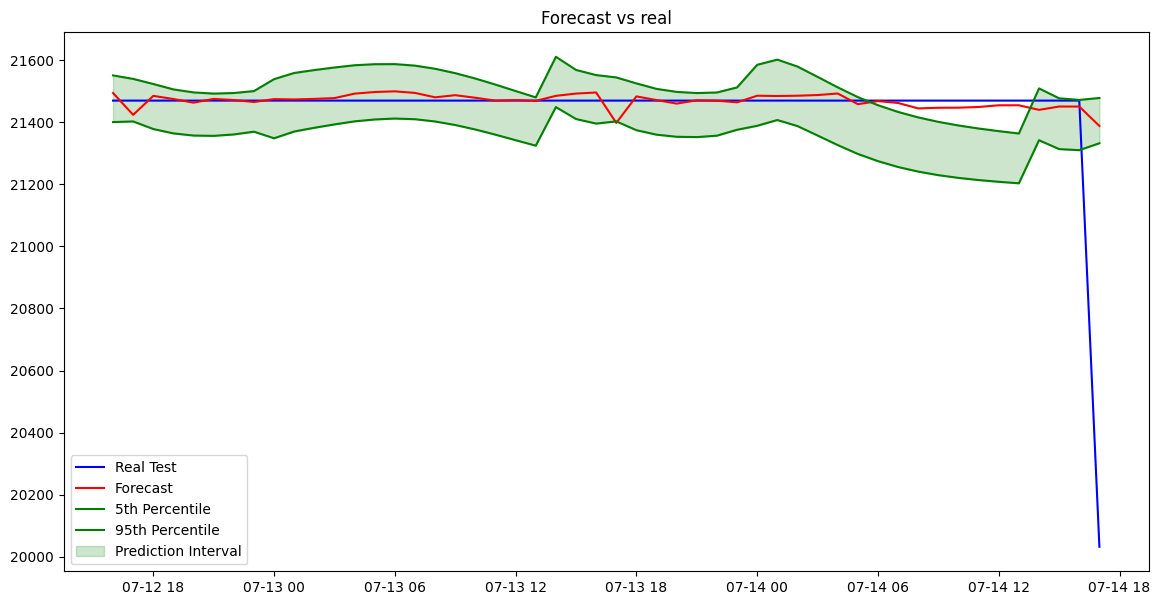

In [50]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real Test', color='blue')
plt.plot(y_test.index, model.predict(X_test[important_features]), label='Forecast', color='red')
plt.plot(y_test.index, y_pred_lower, label='5th Percentile', color='green')
plt.plot(y_test.index, y_pred_upper, label='95th Percentile', color='green')
plt.fill_between(y_test.index, y_pred_lower, y_pred_upper, color='green', alpha=0.2, label='Prediction Interval')

plt.legend()
plt.legend()
plt.title('Forecast vs real')
plt.show()

In [51]:
mean_absolute_error(y_test, model.predict(X_test[important_features])), mean_squared_error(y_test, model.predict(X_test[important_features]))

(41.95675877870817, 37180.41900060724)

Text(0.5, 1.0, 'Residuals')

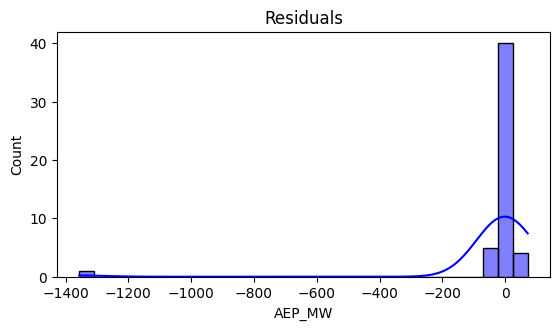

In [52]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals')

Text(0, 0.5, 'Residuals')

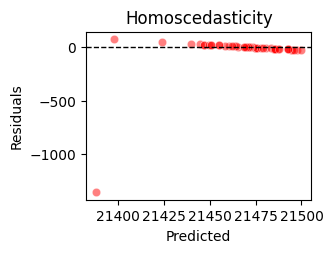

In [53]:
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred, y=residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

Ну вообще стало получше и по метрикам, и по графикам чуть-чуть тоже

Построй новую модель. Используй другую библиотеку для метода градиентного бустинга или метод случайного леса. Построй прогноз для тестовой выборки.
- Настрой гиперпараметры модели.
- Оцени важность признаков.
- Проведи отбор признаков. Стратегия отбора на твоё усмотрение.
- Построй интервальный прогноз с помощью квантильной регрессии.
- Построй графики.
- Оцени качество построенной модели.
- Проведи анализ остатков.

In [55]:
!pip install -q lightgbm

In [58]:
# твой код
import lightgbm as lgb

In [60]:
def objective(trial):
    param = {
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
    }

    model = lgb.LGBMRegressor(**param, silent=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-12-08 12:43:32,963] A new study created in memory with name: no-name-7d5732bd-b8cc-458b-8f3f-ba4a3609c571


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2024-12-08 12:43:41,067] Trial 0 finished with value: 196.52520943214506 and parameters: {'num_leaves': 61, 'learning_rate': 0.08844329656636, 'n_estimators': 845, 'max_depth': 5}. Best is trial 0 with value: 196.52520943214506.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number o

[I 2024-12-08 12:43:47,785] Trial 1 finished with value: 199.14469166453327 and parameters: {'num_leaves': 56, 'learning_rate': 0.06966726096277832, 'n_estimators': 972, 'max_depth': 11}. Best is trial 0 with value: 196.52520943214506.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2024-12-08 12:43:55,736] Trial 2 finished with value: 184.16767204575436 and parameters: {'num_leaves': 65, 'learning_rate': 0.08469094661650314, 'n_estimators': 784, 'max_depth': 4}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635


[I 2024-12-08 12:43:59,171] Trial 3 finished with value: 190.84162522476726 and parameters: {'num_leaves': 86, 'learning_rate': 0.03315043240786176, 'n_estimators': 215, 'max_depth': 11}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-12-08 12:44:01,509] Trial 4 finished with value: 190.2981186696101 and parameters: {'num_leaves': 93, 'learning_rate': 0.08914832059050648, 'n_estimators': 203, 'max_depth': 7}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

[I 2024-12-08 12:44:08,975] Trial 5 finished with value: 197.84507498820986 and parameters: {'num_leaves': 35, 'learning_rate': 0.08704555101126281, 'n_estimators': 961, 'max_depth': 8}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-12-08 12:44:15,793] Trial 6 finished with value: 194.0669159536229 and parameters: {'num_leaves': 91, 'learning_rate': 0.04943551820916001, 'n_estimators': 658, 'max_depth': 7}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-12-08 12:44:24,077] Trial 7 finished with value: 190.2059106322681 and parameters: {'num_leaves': 65, 'learning_rate': 0.01451256454609088, 'n_estimators': 624, 'max_depth': 8}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635


[I 2024-12-08 12:44:30,252] Trial 8 finished with value: 190.10431433376417 and parameters: {'num_leaves': 25, 'learning_rate': 0.024378283435830487, 'n_estimators': 930, 'max_depth': 7}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-12-08 12:44:35,934] Trial 9 finished with value: 191.12152645477326 and parameters: {'num_leaves': 81, 'learning_rate': 0.017668694242663922, 'n_estimators': 446, 'max_depth': 5}. Best is trial 2 with value: 184.16767204575436.


[LightGBM] [Warning] Unknown parameter: silent


In [61]:
best_params = study.best_params
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1119
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 11
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMRegressor(learning_rate=0.08469094661650314, max_depth=4, n_estimators=784,
              num_leaves=65)

In [62]:
feature_importance = model.feature_importances_
features = X_train.columns

In [63]:
important_features = important_features[:-2]
best_params = study.best_params
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train[important_features], y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1067
[LightGBM] [Info] Number of data points in the train set: 120783, number of used features: 7
[LightGBM] [Info] Start training from score 15558.524635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(learning_rate=0.08469094661650314, max_depth=4, n_estimators=784,
              num_leaves=65)

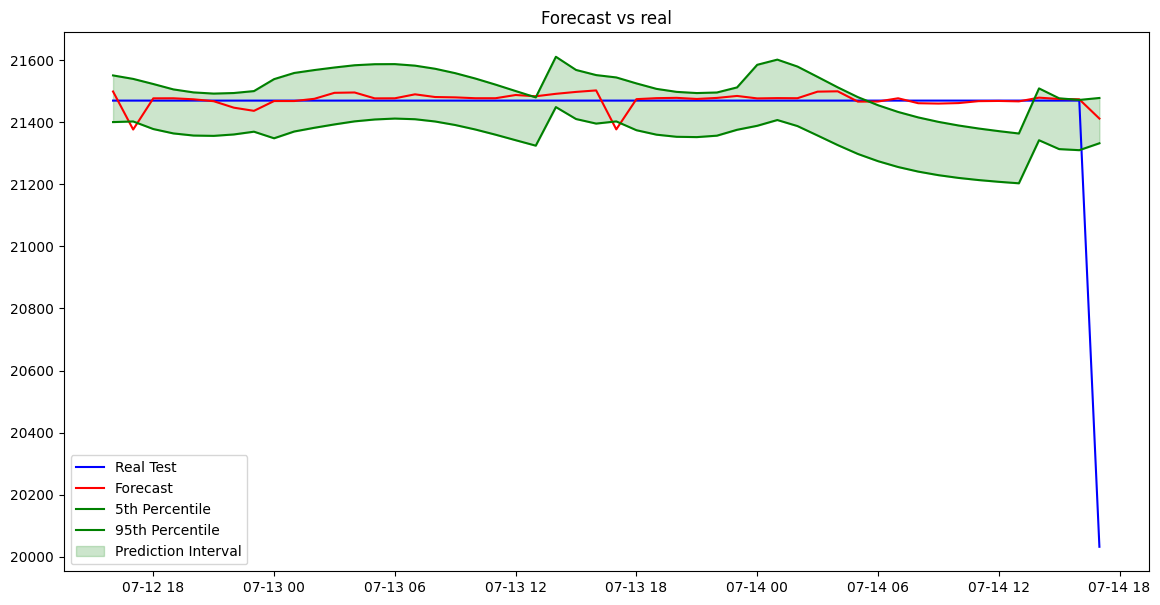

In [64]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real Test', color='blue')
plt.plot(y_test.index, model.predict(X_test[important_features]), label='Forecast', color='red')
plt.plot(y_test.index, y_pred_lower, label='5th Percentile', color='green')
plt.plot(y_test.index, y_pred_upper, label='95th Percentile', color='green')
plt.fill_between(y_test.index, y_pred_lower, y_pred_upper, color='green', alpha=0.2, label='Prediction Interval')

plt.legend()
plt.legend()
plt.title('Forecast vs real')
plt.show()

In [65]:
mean_absolute_error(y_test, model.predict(X_test[important_features])), mean_squared_error(y_test, model.predict(X_test[important_features]))

(42.29580637079387, 38646.94887812385)

Эта версия похуже

Text(0.5, 1.0, 'Residuals')

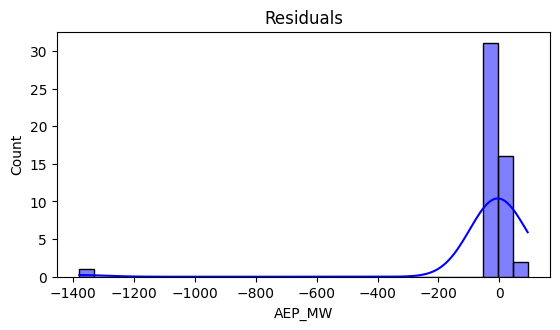

In [67]:
y_pred = model.predict(X_test[important_features])
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals')

Text(0, 0.5, 'Residuals')

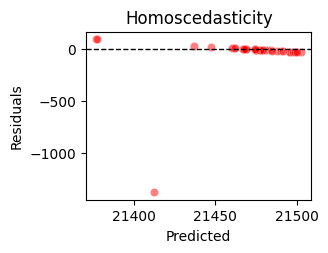

In [68]:
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_pred, y=residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Homoscedasticity')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

Все еще сложно с резким падением в конце, а так модель терпимая


#### Кросс-валидация

Реализуй одну из стратегий кросс-валидации и выбери лучшую модель на основе всей доступной информации.

In [70]:
import xgboost as xgb

In [69]:
# твой код
from sklearn.model_selection import TimeSeriesSplit

In [71]:
tscv = TimeSeriesSplit(n_splits=3)

def objective(trial):
    params = {
        'eta': trial.suggest_float('eta', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500)
    }

    mae_scores = []
    for train_index, val_index in tscv.split(X_train):
        X_train_new, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_new, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model = xgb.XGBRegressor(**params)
        model.fit(X_train_new, y_train_new, eval_set=[(X_val, y_val)], verbose=0)
        y_pred = model.predict(X_val)
        mae_scores.append(mean_absolute_error(y_val, y_pred))
    return np.mean(mae_scores)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-12-08 12:54:37,316] A new study created in memory with name: no-name-77f0bdbb-6653-4457-96c8-f33c597dc90d
[I 2024-12-08 12:54:51,030] Trial 0 finished with value: 248.25444034349644 and parameters: {'eta': 0.07038289576371835, 'max_depth': 7, 'subsample': 0.8376996212359548, 'colsample_bytree': 0.7190761918944915, 'n_estimators': 295}. Best is trial 0 with value: 248.25444034349644.
[I 2024-12-08 12:55:02,239] Trial 1 finished with value: 256.77148588428685 and parameters: {'eta': 0.018362299653982523, 'max_depth': 3, 'subsample': 0.5379066294498491, 'colsample_bytree': 0.8971133663402371, 'n_estimators': 308}. Best is trial 0 with value: 248.25444034349644.
[I 2024-12-08 12:55:06,617] Trial 2 finished with value: 277.64562526735943 and parameters: {'eta': 0.032626611623825616, 'max_depth': 3, 'subsample': 0.9591564544836881, 'colsample_bytree': 0.9288457556940093, 'n_estimators': 149}. Best is trial 0 with value: 248.25444034349644.
[I 2024-12-08 12:55:19,611] Trial 3 finished

In [72]:
best_params = study.best_params
best_model = xgb.XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8770578751303204, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.03892955023867635, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=145, n_jobs=None,
             num_parallel_tree=None, ...)

In [74]:
X_train

,year,month,day,weekday,hour,quarter,trend_day,seasonal_day,trend_week,seasonal_week,is_weekend
Datetime,,,,,,,,,,,
2004-10-01 01:00:00,2004,10,1,4,1,4,14174.015843,-1604.429364,14180.764543,-1792.918253,False
2004-10-01 02:00:00,2004,10,1,4,2,4,14172.757556,-2063.619148,14181.529141,-2219.080817,False
2004-10-01 03:00:00,2004,10,1,4,3,4,14171.241801,-2290.656374,14182.142730,-2410.933980,False
2004-10-01 04:00:00,2004,10,1,4,4,4,14169.440188,-2361.575011,14182.561328,-2429.956278,False
2004-10-01 05:00:00,2004,10,1,4,5,4,14167.327704,-2290.730204,14182.734095,-2246.011433,False
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-12 11:00:00,2018,7,12,3,11,3,21470.087194,7.318983,21473.546326,-93.775287,False
2018-07-12 12:00:00,2018,7,12,3,12,3,21470.351262,6.342424,21472.254819,-104.639065,False
2018-07-12 13:00:00,2018,7,12,3,13,3,21470.531967,5.358985,21470.903315,-115.494681,False


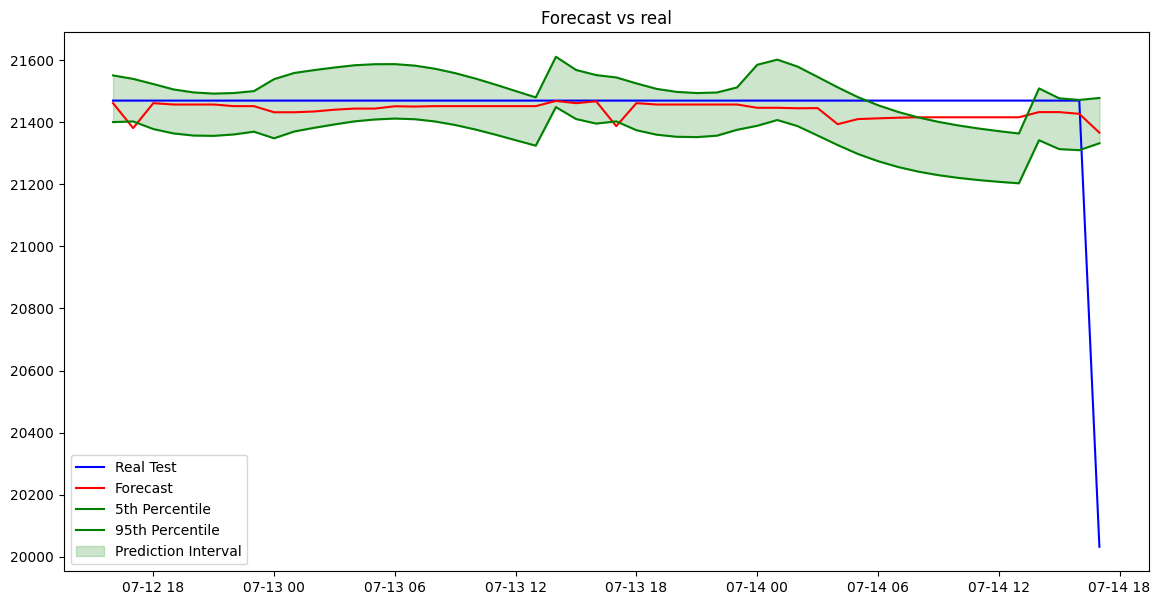

In [76]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real Test', color='blue')
plt.plot(y_test.index, best_model.predict(X_test), label='Forecast', color='red')
plt.plot(y_test.index, y_pred_lower, label='5th Percentile', color='green')
plt.plot(y_test.index, y_pred_upper, label='95th Percentile', color='green')
plt.fill_between(y_test.index, y_pred_lower, y_pred_upper, color='green', alpha=0.2, label='Prediction Interval')

plt.legend()
plt.legend()
plt.title('Forecast vs real')
plt.show()

In [78]:
mean_absolute_error(y_test, best_model.predict(X_test)), mean_squared_error(y_test, best_model.predict(X_test))

(55.9347265625, 36937.0571849823)

Так, ну, это не лучшая модель из всех, которые затестила, побеждает скорее все-таки катбуст на RMSE, но эта модель тоже ничего, не кошмар

# Анализ персонального датасета (6 баллов)

Построй прогнозы с помощью метода градиентного бустинга для твоего персонального набора данных. Модель обучай сразу для всех временных рядов (глобальная модель). Можешь разбить набор на группы и для каждой группы обучить свою модель на основе GBM. Обоснуй разбиение на группы.

- Создай новые признаки.
- Настрой гиперпараметры модели.
- Оцени важность признаков.
- Проведи отбор признаков. Стратегия отбора на твоё усмотрение.
- Построй интервальный прогноз с помощью квантильной регрессии.
- Построй графики.
- Оцени качество построенных моделей.
- Выбери лучшую модель.
- Проведи анализ остатков.

Мой датасет все еще https://www.kaggle.com/datasets/m0h1t50n1/google-traffic-flow-dataset?select=train.csv

Работаю с трейном


In [79]:
df = pd.read_csv('train.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   5 Minutes                    7776 non-null   object
 1   Lane 1 Flow (Veh/5 Minutes)  7776 non-null   int64 
 2   # Lane Points                7776 non-null   int64 
 3   % Observed                   7776 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 243.1+ KB


In [81]:
df['datetime'] = pd.to_datetime(df['5 Minutes'], format='mixed')
df.head()

,5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed,datetime
0,04/01/2016 0:00,12,1,100,2016-04-01 00:00:00
1,04/01/2016 0:05,13,1,100,2016-04-01 00:05:00
2,04/01/2016 0:10,11,1,100,2016-04-01 00:10:00
3,04/01/2016 0:15,13,1,100,2016-04-01 00:15:00
4,04/01/2016 0:20,10,1,100,2016-04-01 00:20:00


In [83]:
df = df.drop_duplicates()
df = df.dropna()
df = df[['datetime', 'Lane 1 Flow (Veh/5 Minutes)']]
df.set_index('datetime', inplace=True)

In [85]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['quarter'] = df.index.quarter

In [86]:
def define_traffic(hour):
    if 7 <= hour < 10:
        return 1
    elif 16 <= hour < 19:
        return 1
    else:
        return 0

df['traffic'] = df.index.hour.map(define_traffic)

In [89]:
df['is_weekend'] = df.index.weekday >= 5

In [91]:
size_ = 50
train = df[: -size_]
test = df[-size_: ]
X_train = train[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'traffic', 'is_weekend']]
y_train = train['Lane 1 Flow (Veh/5 Minutes)']
X_test = test[['year', 'month', 'day', 'weekday', 'hour', 'quarter', 'traffic', 'is_weekend']]
y_test = test['Lane 1 Flow (Veh/5 Minutes)']

In [94]:
# твой код
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 5, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10)
    }

    model = CatBoostRegressor(**param, verbose=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, y_pred))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2024-12-08 13:16:46,369] A new study created in memory with name: no-name-ec47c1c0-827e-4d26-b3b4-1505206d28e8
[I 2024-12-08 13:16:48,257] Trial 0 finished with value: 7.878901757461731 and parameters: {'iterations': 1270, 'learning_rate': 0.04916294514273103, 'depth': 5, 'l2_leaf_reg': 1}. Best is trial 0 with value: 7.878901757461731.
[I 2024-12-08 13:16:49,826] Trial 1 finished with value: 7.223538481923912 and parameters: {'iterations': 674, 'learning_rate': 0.04070314479511299, 'depth': 9, 'l2_leaf_reg': 3}. Best is trial 1 with value: 7.223538481923912.
[I 2024-12-08 13:16:51,337] Trial 2 finished with value: 6.9265020767456225 and parameters: {'iterations': 846, 'learning_rate': 0.01660221879349428, 'depth': 7, 'l2_leaf_reg': 7}. Best is trial 2 with value: 6.9265020767456225.
[I 2024-12-08 13:16:52,563] Trial 3 finished with value: 7.646141640162741 and parameters: {'iterations': 847, 'learning_rate': 0.06111765427995979, 'depth': 5, 'l2_leaf_reg': 3}. Best is trial 2 with v

In [95]:
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train, y_train)
feature_importance = model.get_feature_importance()
features = X_train.columns
important_features = features[np.argsort(feature_importance)[::-1]]
important_features

Index(['hour', 'traffic', 'day', 'weekday', 'month', 'quarter', 'is_weekend',
       'year'],
      dtype='object')

In [96]:
important_features = important_features[:-2]
best_params = study.best_params
model = CatBoostRegressor(**best_params, verbose=0)
model.fit(X_train[important_features], y_train)

In [97]:
quantile_model_lower = QuantileRegressor(quantile=0.05, alpha=0).fit(X_train[important_features], y_train)
quantile_model_upper = QuantileRegressor(quantile=0.95, alpha=0).fit(X_train[important_features], y_train)
y_pred_lower = quantile_model_lower.predict(X_test[important_features])
y_pred_upper = quantile_model_upper.predict(X_test[important_features])

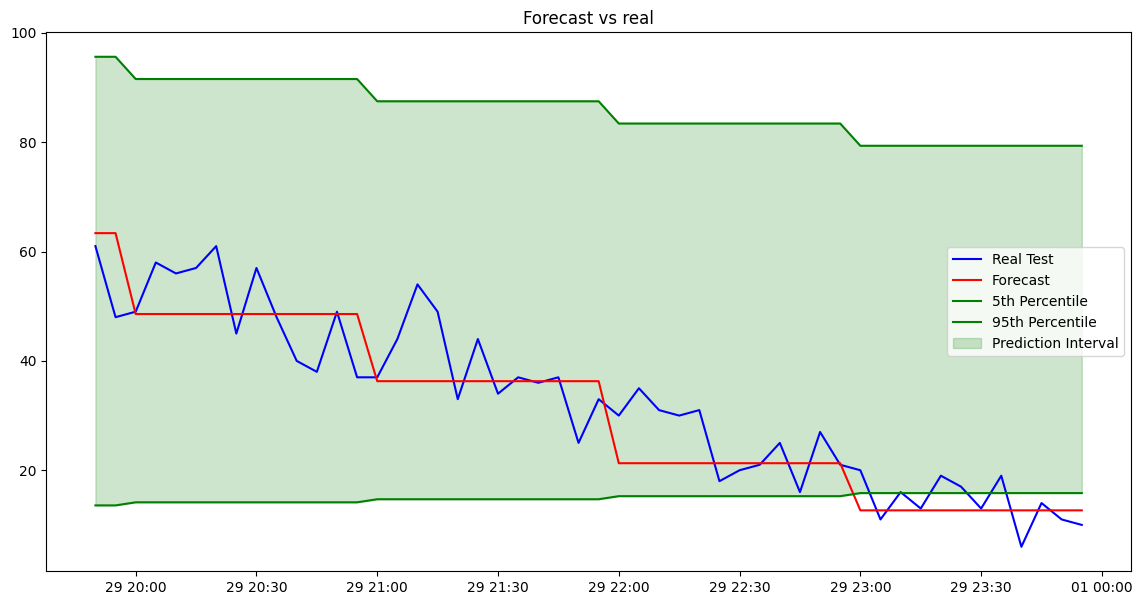

In [98]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Real Test', color='blue')
plt.plot(y_test.index, model.predict(X_test[important_features]), label='Forecast', color='red')
plt.plot(y_test.index, y_pred_lower, label='5th Percentile', color='green')
plt.plot(y_test.index, y_pred_upper, label='95th Percentile', color='green')
plt.fill_between(y_test.index, y_pred_lower, y_pred_upper, color='green', alpha=0.2, label='Prediction Interval')

plt.legend()
plt.legend()
plt.title('Forecast vs real')
plt.show()

Ну, квантильная ререссия тут не очень, а наш прогноз не учитывает очень большого количества пиков и спадов, но зато неплохо улавливает тренд

In [99]:
mean_absolute_error(y_test, model.predict(X_test[important_features])), mean_squared_error(y_test, model.predict(X_test[important_features]))

(5.615727959263595, 52.07538950353588)

Text(0.5, 1.0, 'Residuals')

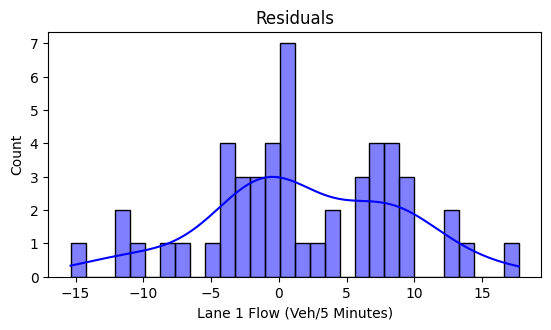

In [100]:
y_pred = model.predict(X_test[important_features])
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals')

Попробовала еще такую штуку

In [104]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test p-value={p_value}")
if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")

Shapiro-Wilk test p-value=0.5300418687783722
Residuals are normally distributed.


То, что остатки нормально распределены, это хорошо.

Сравни качество построенных моделей в этом домашнем задании с качеством моделей, построенных ранее для этого датасета.

В прошлый раз у меня MAE и MSE вышли такими (43.78451703916582, 3042.9901726125013), сейчас значение ошибки и там, и там сильно ниже, с остатками сейчас, очевидно, ситуация тоже лучше.

In [ ]:
# твой код или текст

## Бонус (1 балл)

Попробуй для подбора гиперпараметов моделей библиотеку Optune:
- https://optuna.readthedocs.io/en/v2.0.0/index.html,
- https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/,
- https://github.com/catboost/tutorials/tree/master/hyperparameters_tuning.


Попробуй для оценки важности признаков значения Шепли (SHAP values):

- https://christophm.github.io/interpretable-ml-book/shapley.html.
- https://github.com/shap/shap/tree/master.
- Scott M Lundberg and Su-In Lee. A unified approach to interpreting model predictions. In Proceedings of the 31st international conference on neural information processing systems, pages 4768–4777, 2017.
- Scott M Lundberg and Su-In Lee. A unified approach to interpreting model predictions. In Proceedings of the 31st international conference on neural information processing systems (2017), Supplementary material (https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Supplemental.zip).
- Scott M Lundberg, Gabriel G Erion, and Su-In Lee. Consistent individualized feature attribution for tree ensembles. 2018. https://arxiv.org/abs/1802.03888
- Jilei Yang. Fast TreeSHAP: Accelerating SHAP Value Computation for Trees. 2021. https://arxiv.org/abs/2109.09847

#### За лучшую работу начисляется 1 бонусный балл